In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from pandas import read_excel
from scipy.optimize import curve_fit
import prettytable

Importação de dados

In [16]:
df = pd.read_excel('Planilha do raio-x.xlsx', sheet_name='Dados', header=None, names=['A', 'B', 'C', 'D','E', 'F'])
df = df.replace({',': '.'}, regex=True)
df


,A,B,C,D,E,F
0,2.5,18,10,9,3,0
1,2.6,17,7,9,2,0
2,2.7,3,5,11,0,0
3,2.8,3,12,3,4,1
4,2.9,20,12,5,4,2
...,...,...,...,...,...,...
271,29.6,17,11,10,6,0
272,29.7,25,11,7,7,0
273,29.8,20,9,5,6,3
274,29.9,26,15,22,7,4


Plot 35KV, 30KV, 28KV, 25KV, 18KV

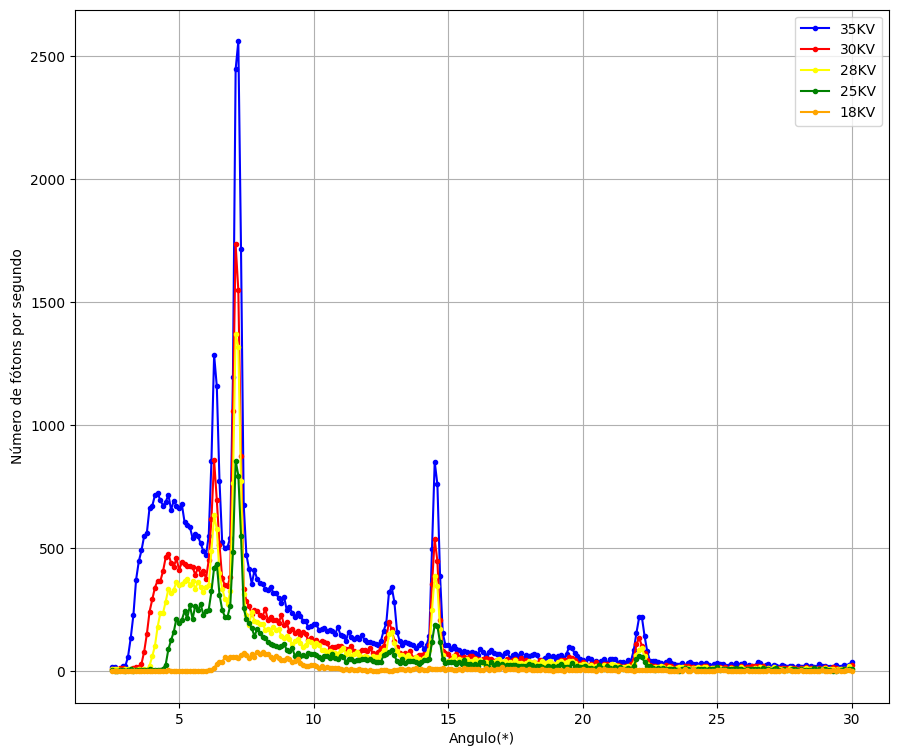

In [17]:
plt.figure(figsize=(10.5, 9))

plt.plot(df['A'], df['B'], label='35KV', marker='.', color='Blue')
plt.plot(df['A'], df['C'], label='30KV', marker='.', color='Red')
plt.plot(df['A'], df['D'], label='28KV', marker='.', color='Yellow')
plt.plot(df['A'], df['E'], label='25KV', marker='.', color='Green')
plt.plot(df['A'], df['F'], label='18KV', marker='.', color='Orange')
plt.xlabel('Angulo(*)')
plt.ylabel('Número de fótons por segundo')
plt.grid()
plt.legend()
plt.show()

Calculo de I_a / I_b == n_a / n_b pela hipótese de planck 

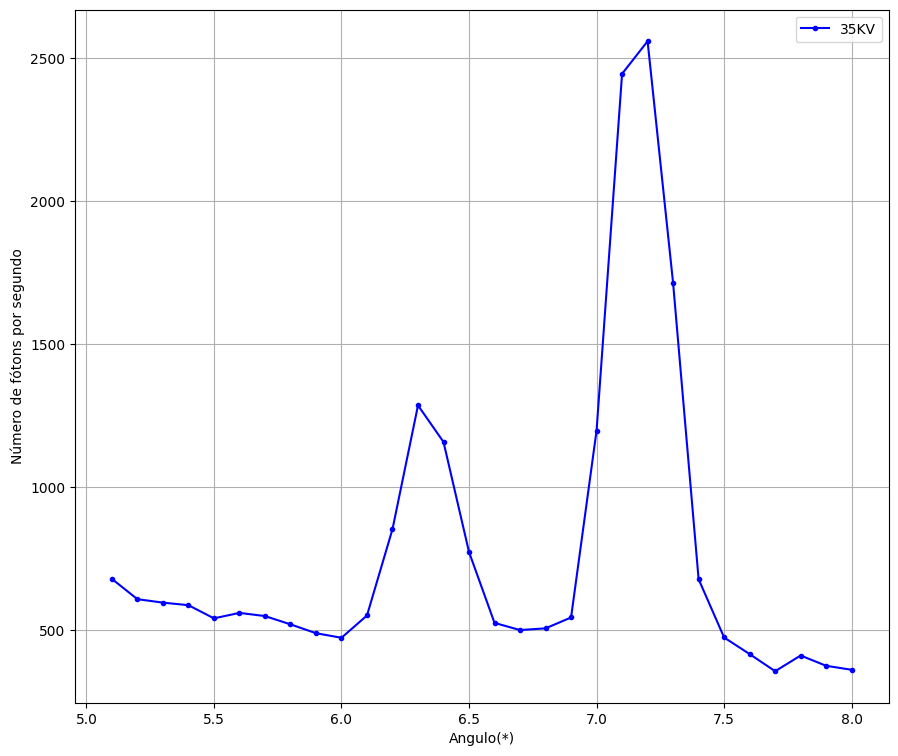

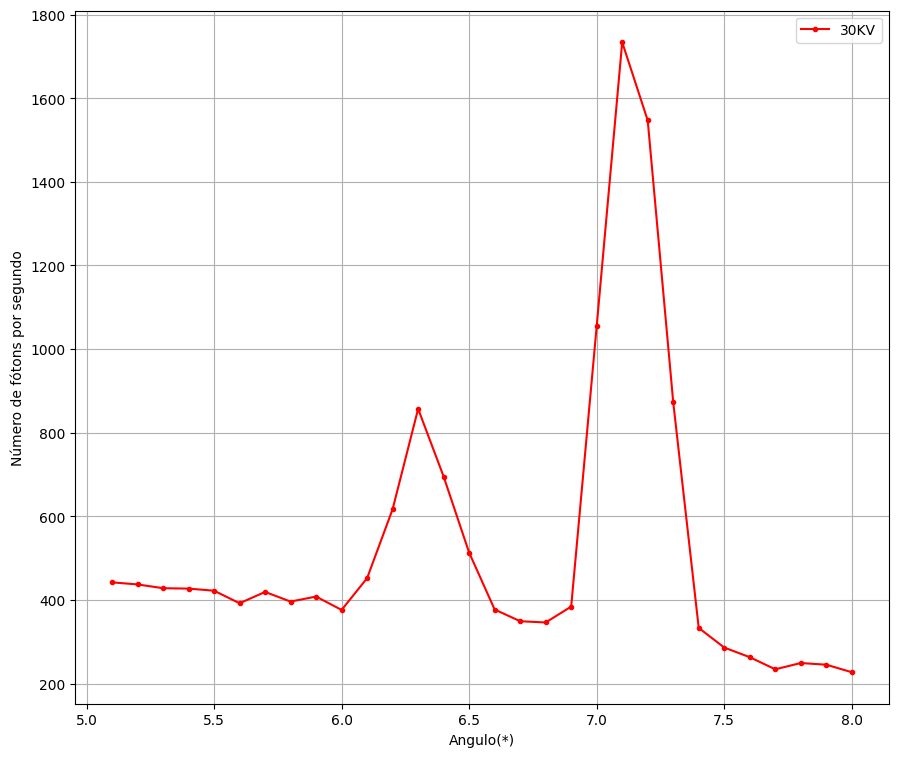

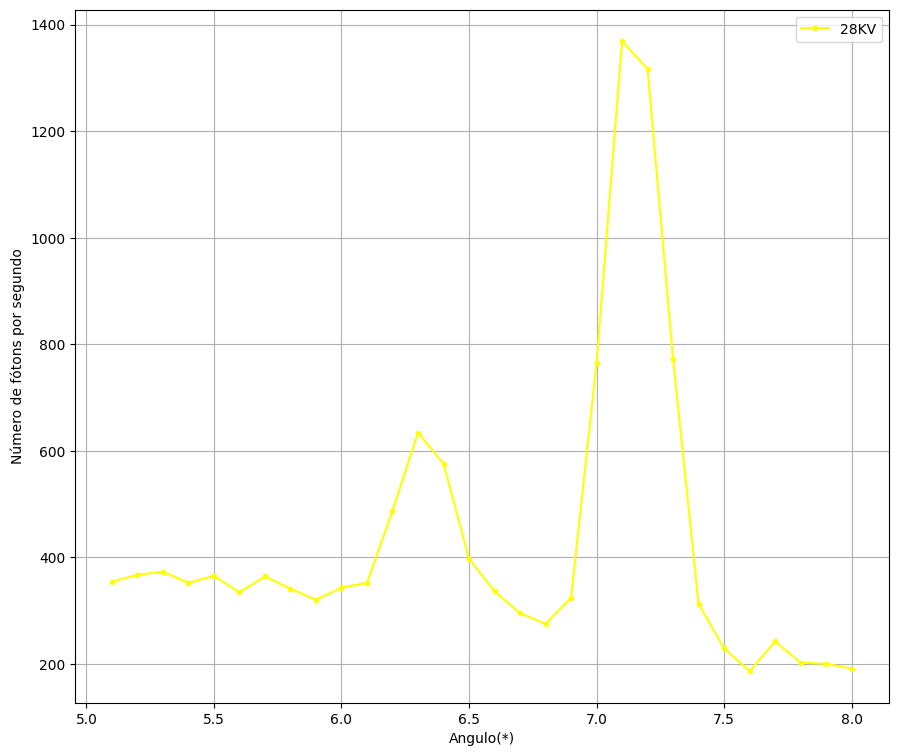

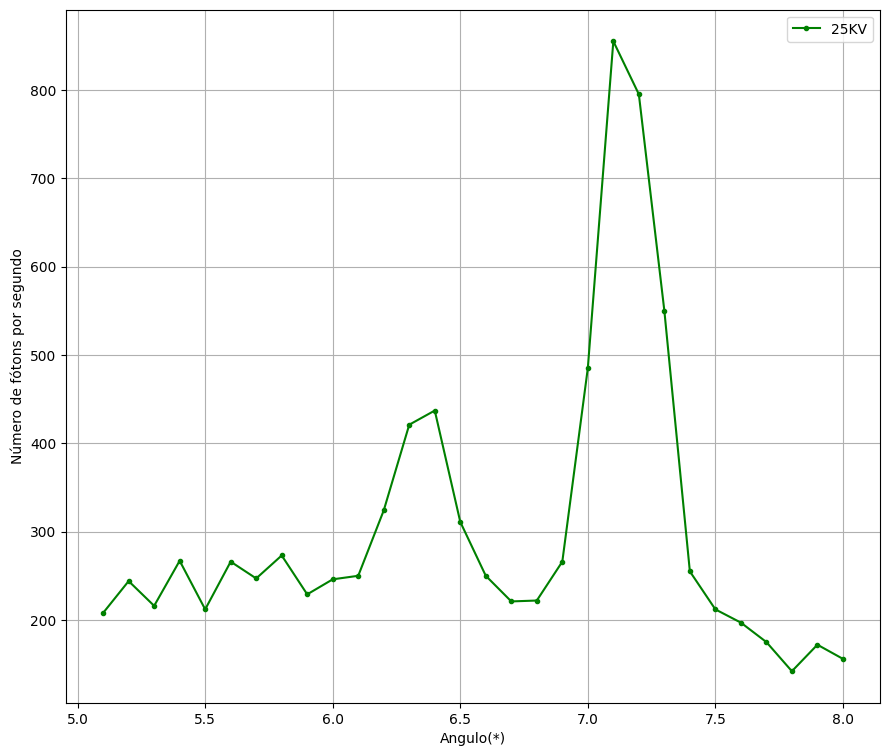

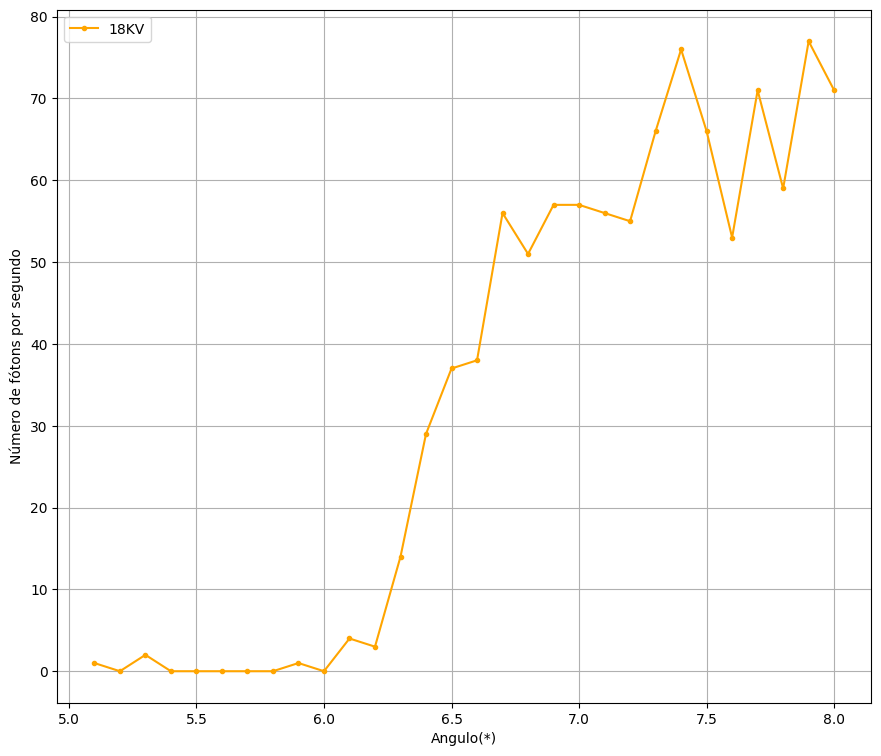

In [25]:
cores = ['Blue', 'Red', 'Yellow', 'Green', 'Orange']
voltagens =['35KV', '30KV', '28KV', '25KV', '18KV']
grafs = ['B', 'C', 'D', 'E', 'F']
def raz(cor, voltagem, graf):
    selecANG =[]
    selecNF = []
    for i in range(0, 275):
        if df['A'][i] >= 5.01  and df['A'][i] <= 8 :
            selecANG.append(df['A'][i])
            selecNF.append(df[graf][i])
    
    plt.figure(figsize=(10.5, 9))
    plt.plot(selecANG, selecNF, label=voltagem, marker='.', color=cor )
    plt.xlabel('Angulo(*)')
    plt.ylabel('Número de fótons por segundo')
    plt.grid()
    plt.legend()
    plt.show()


for j in range(0, 5):
    raz(cor =cores[j], voltagem= voltagens[j], graf= grafs[j])

        

Obtenção da constante de Plank

In [ ]:
def hgenerator():
    